In [1]:
#Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

%matplotlib inline

In [2]:
#Import the dataset
data_set= pd.read_csv('Salary_year.csv')
#dataset that has two variables: salary (dependent variable) and experience (Independent variable).

In [3]:
data_set.head(2)

,YearsExperience,Salary
0,1.0,32383
1,1.1,45207


In [4]:
x= data_set.iloc[:, :-1].values #copy all columns excluding last column
y= data_set.iloc[:, 1].values #copy the last column only

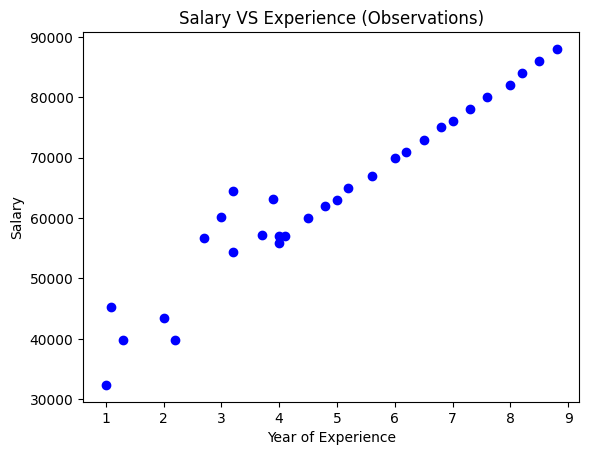

In [5]:
# Visualize the dataset
mtp.scatter(x, y, color='blue')
mtp.title('Salary VS Experience (Observations)')
mtp.xlabel('Year of Experience')
mtp.ylabel('Salary')
mtp.show()

In [6]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

# There are 30 observations or rows in the dataset. 
# This dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size. 
# In this example test_size=1/3 says that 20 observations are used for training and rest 10 observations are used for testing.
# randam_state is the seed for the random number generator

In [7]:
#Fitting the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression

#Create the model
model= LinearRegression()

#Train the model
model.fit(x_train, y_train) 

#x_train: Year of experience
#y_train: Salary

LinearRegression()

In [8]:
#r-square value
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination : {r_sq}")

coefficient of determination : 0.896323114885137


In [9]:
print('Slope(Coefficient):', model.coef_)
print('Intercept:', model.intercept_)

#Salary = 34636.727413178916 + 5994.3184079 * [Experience]

Slope(Coefficient): [5994.3184079]
Intercept: 34636.727413178916


In [17]:
#Prediction of Test and Training set result
x_pred= model.predict(x_train)
y_pred= model.predict(x_test)

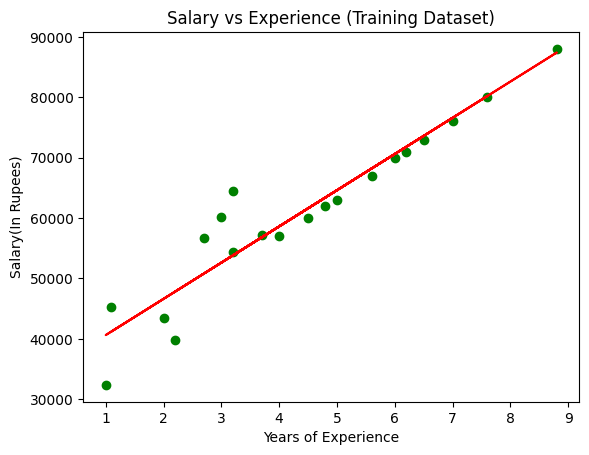

In [11]:
#Visualize the fitted regression line
mtp.scatter(x_train, y_train, color="green")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Salary vs Experience (Training Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()

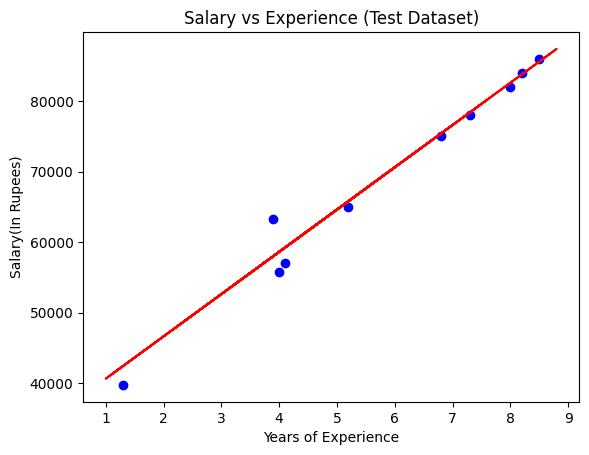

In [12]:
#visualizing the Test set results
mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Salary vs Experience (Test Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()

In [18]:
#Making Predictions

#Predict salary that can be offered for 7 years of experience
x = np.atleast_1d(7).reshape(-1,1) # convert scalar to array

#Predict the value 
y_pred_ = model.predict(x)

print('For x= 7 yrs of experience, predicted salary = ', y_pred_)

For x= 7 yrs of experience, predicted salary =  [76596.95626851]


In [15]:
y_test

array([39751, 86000, 57081, 63218, 82000, 78000, 84000, 55794, 65000,
       75000], dtype=int64)

In [19]:
y_pred

array([42429.34134346, 85588.43388037, 59213.43288559, 58014.56920401,
       82591.27467642, 78395.25179088, 83790.138358  , 58614.0010448 ,
       65807.18313428, 75398.09258693])

In [20]:
#Performance measures

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(y_test, y_pred))

Mean squared error = 4827816.09
Variance score = 0.98


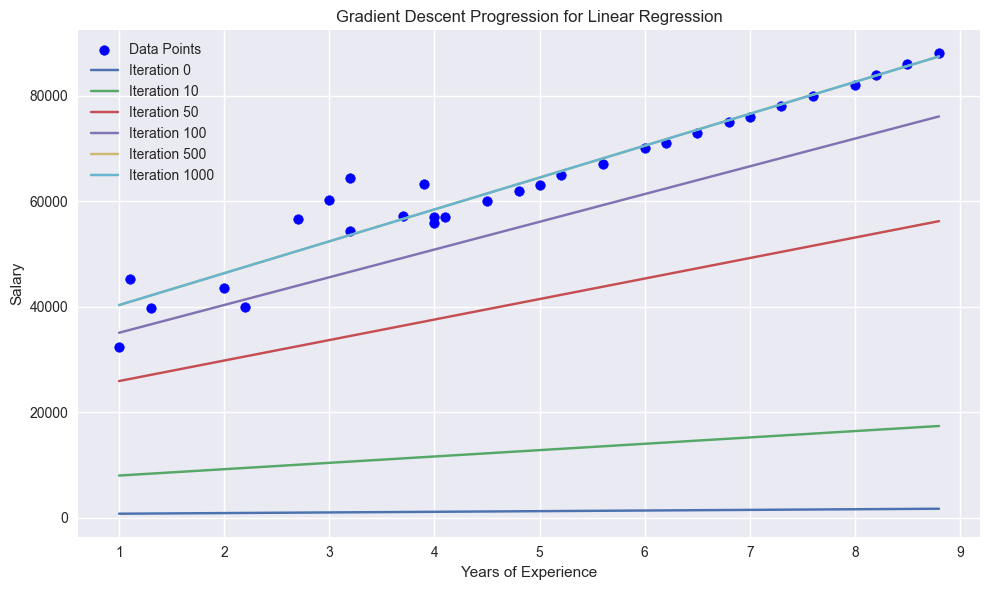

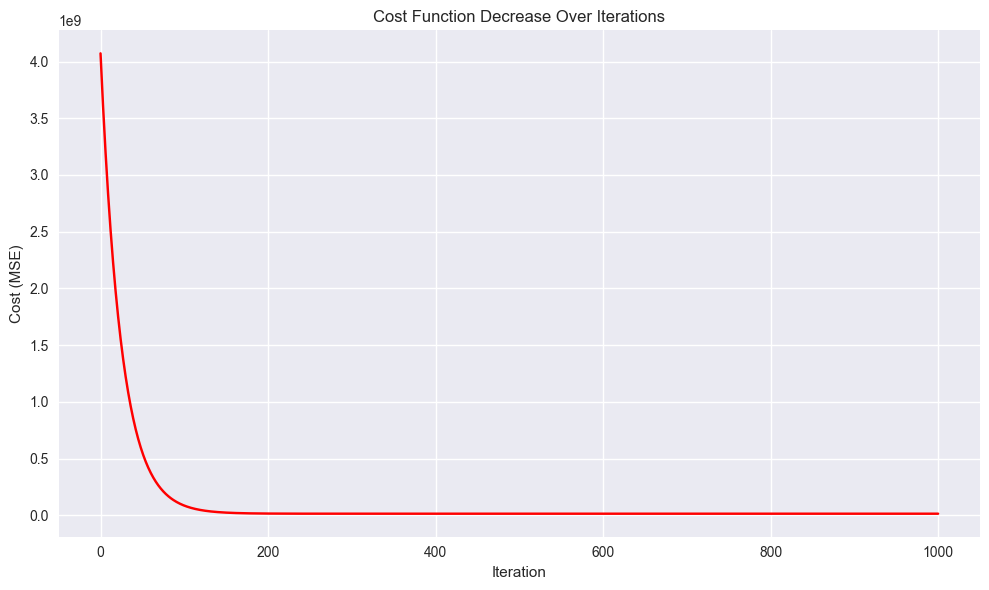

In [22]:
# Visualizing Gradient Descent for Simple Linear Regression on Salary Dataset

#data_set.head(4)

X = data_set['YearsExperience'].values
y = data_set['Salary'].values

# Normalize features for better gradient descent performance
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

# Add intercept term
X_b = np.c_[np.ones(len(X_norm)), X_norm]

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 1000
m = len(y)
theta = np.zeros(2) #initialising theta(0) and theta(1) to zero
cost_history = []

# Store theta at specific iterations for plotting
iterations_to_plot = [0, 10, 50, 100, 500, 1000]
theta_history = {}

# Gradient Descent Loop
for iteration in range(n_iterations + 1):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
    cost = np.mean((X_b.dot(theta) - y) ** 2)
    cost_history.append(cost)
    if iteration in iterations_to_plot:
        theta_history[iteration] = theta.copy()

# Plotting regression lines at selected iterations
mtp.style.use('seaborn-v0_8')
mtp.figure(figsize=(10, 6))
mtp.scatter(X, y, color='blue', label='Data Points')

x_vals = np.linspace(min(X), max(X), 100)
x_vals_norm = (x_vals - X_mean) / X_std

for iteration, theta in theta_history.items():
    y_vals = theta[0] + theta[1] * x_vals_norm
    mtp.plot(x_vals, y_vals, label=f'Iteration {iteration}')

mtp.xlabel('Years of Experience')
mtp.ylabel('Salary')
mtp.title('Gradient Descent Progression for Linear Regression')
mtp.legend()
mtp.tight_layout()
mtp.show()

# Plotting cost function decrease
mtp.figure(figsize=(10, 6))
mtp.plot(range(n_iterations + 1), cost_history, color='red')
mtp.xlabel('Iteration')
mtp.ylabel('Cost (MSE)')
mtp.title('Cost Function Decrease Over Iterations')
mtp.tight_layout()
mtp.show()